# Main Library

In [1]:
# Reading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing 
import nltk, string, re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Splitting Data
from sklearn.model_selection import train_test_split

# Building Deep Learning Model
import tensorflow.keras as k
from tensorflow.keras.layers import Dense, Embedding, Dropout, GlobalAveragePooling1D, LSTM

# Reading Data

In [2]:
data = pd.read_csv(r"D:\Courses language programming\11_Natural Language Processing\Projects For NLP\Data\a1_RestaurantReviews_HistoricDump.tsv", delimiter="\t")

data.head(5)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  900 non-null    object
 1   Liked   900 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.2+ KB


# Preprocessing Data

### 1 - Remove Punc & Stopwords
### 2 - Make Lemmatization

In [5]:
punc = list(string.punctuation)
stop_words = stopwords.words("english")
lemma = WordNetLemmatizer()

In [6]:
# def process_data(data):
#     data = data.lower()
    
#     data = " ".join([lemma.lemmatize(word) for word in word_tokenize(data) if ((word not in punc) and (word not in stop_words))])
    
#     return data

def process_data(data):
    data = data.lower()
    
    data = " ".join([word for word in word_tokenize(data) if ((word not in punc) and (word not in stop_words))])
    
    return data

In [7]:
data["Review"] = data["Review"].apply(process_data)

In [8]:
data.head(5)

,Review,Liked
0,wow ... loved place,1
1,crust good,0
2,tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great prices,1


# Splitting Data to X & Y

In [9]:
X = data["Review"]
Y = data["Liked"]

# Make Tokenization

In [10]:
tokenize = Tokenizer(oov_token="<OOv>")
tokenize.fit_on_texts(X)

data_seq = tokenize.texts_to_sequences(X)
max_len = max([len(i) for i in data_seq])

data_padding = pad_sequences(data_seq, maxlen=max_len, padding="post")
print("The Shape Is Padding Data is --> ", data_padding.shape)
print("The Max Length of Word is --> ", max_len)

The Shape Is Padding Data is -->  (900, 21)
The Max Length of Word is -->  21


In [11]:
word_voc_length = len(tokenize.word_index) + 1

# Transform Label To One Hot Encoder

In [12]:
label = to_categorical(Y, 2)

In [13]:
label[:5]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

# Splitting Data To Training & Testing

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data_padding, label, train_size=0.7, shuffle=True, random_state=42)

# Building Deep Learning Model

In [15]:
model = k.models.Sequential([
    Embedding(word_voc_length, 200, input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(128, activation="relu"),
    Dense(2, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 21, 200)           360400    
                                                                 
 global_average_pooling1d (  (None, 200)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 128)               25728     
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 386386 (1.47 MB)
Trainable params: 386386 (1.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
20/20 [==============================] - 1s 11ms/step - loss: 0.6892 - accuracy: 0.5111 - val_loss: 0.6878 - val_accuracy: 0.5407
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6754 - accuracy: 0.5571 - val_loss: 0.6817 - val_accuracy: 0.5407
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6546 - accuracy: 0.6810 - val_loss: 0.6700 - val_accuracy: 0.5481
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5913 - accuracy: 0.7302 - val_loss: 0.6185 - val_accuracy: 0.7296
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4534 - accuracy: 0.9016 - val_loss: 0.5596 - val_accuracy: 0.6852
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2924 - accuracy: 0.9254 - val_loss: 0.5003 - val_accuracy: 0.7519
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.1732 - accuracy: 0.9603 - val_loss: 0.5049 - val_accuracy: 0.7630
Epoch 8/10
20/20 [=

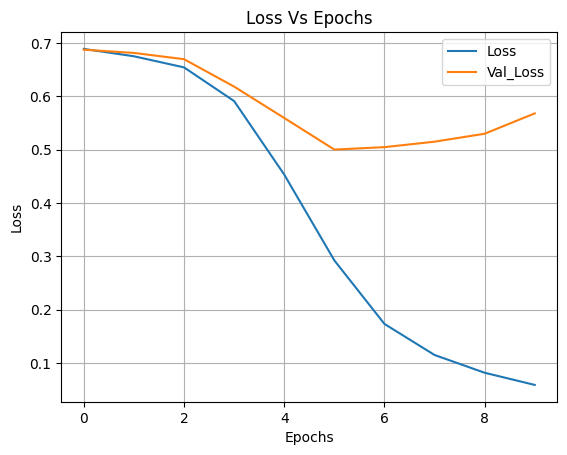

In [17]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

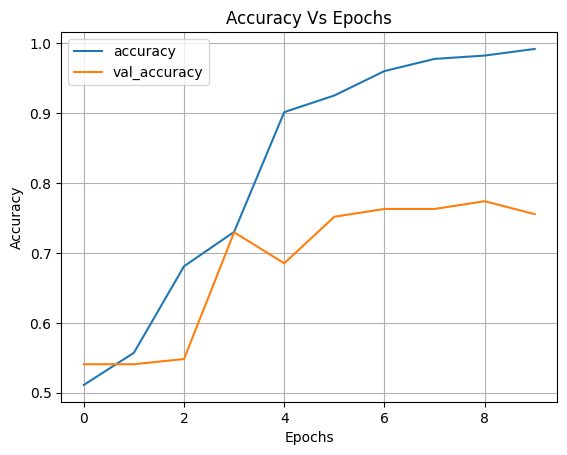

In [18]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

# Download Model

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open(r"D:\Pycharm\model_pickle\NLP - Models\Englis-sentiement-Analysis.bin", "wb"))

In [31]:
!pipreqs

INFO: Successfully saved requirements file in C:\Users\osama\3 - Natural Language Processing\requirements.txt
